# Principal Component Analysis (PCA)

- statistical interpretation of SVD
- hierarchical coordinate system
- unsupervised

$\chi = \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_n \end{bmatrix} $,

where each row vector $x_i$ is a measurement from a single experiment.
EX. x_1 information about a specific human, e.g. age, sex, weight,.. and x_1 is human1, x_2 is human2.

We're expecting that $\chi$ has some statistical properties, variance and so on, and we'll apply SVD to it.

## Algorithm

1. Calculate mean row

$\bar{x}= \frac{1}{n} \sum_{i=1}^n x_j$

$\bar{\chi}$ .. means matrix$

2. Subtract mean (calculate mean centered data)

$B = \chi - \bar{\chi}$

3. Calculate covariance matrix for rows of B

$C = B^T B$

4. Compute eigenvalues of C

e.g. max eigenvalue -> $v_1^T B^T B v_1$

$C V = V D$,

where

.. V - eigenvectors

.. D - eigenvalues

$T = B V$,

where

.. T - principle components

.. V - loadings

$T = U \Sigma$

$B = U \Sigma V^T$




In [1]:
import numpy as np

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = 0
        self.components = np.array([])
        
    def calculate_principal_components(self, X):
        # 1. calculate mean
        self.mean = np.mean(X, axis=0)
        # 2. calculate centered X
        chi = X - self.mean
        # 3. calculate convariance matrix
        # see np.cov documentation -> transpose chi
        covariance_M = np.cov(chi.T)
        # 4. calculate eigenvectors, eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(covariance_M)
        # 5. sort eigenvectors from the most importat ones
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors.T[idxs]
        # 6. use n_component number of eigenvectors
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        chi = X - self.mean
        return np.dot(chi, self.components.T)
    
    def get_components(self):
        return self.components[0:self.n_components]

In [3]:
from sklearn import datasets
import pandas as pd

In [4]:
data = datasets.load_iris()

In [5]:
df = pd.DataFrame(data=data['data'],columns= data['feature_names'])

In [6]:
df_tar = pd.DataFrame(data=data['target'],columns=['target'])

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
corrM = df.corr()

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Correlation Matrix')

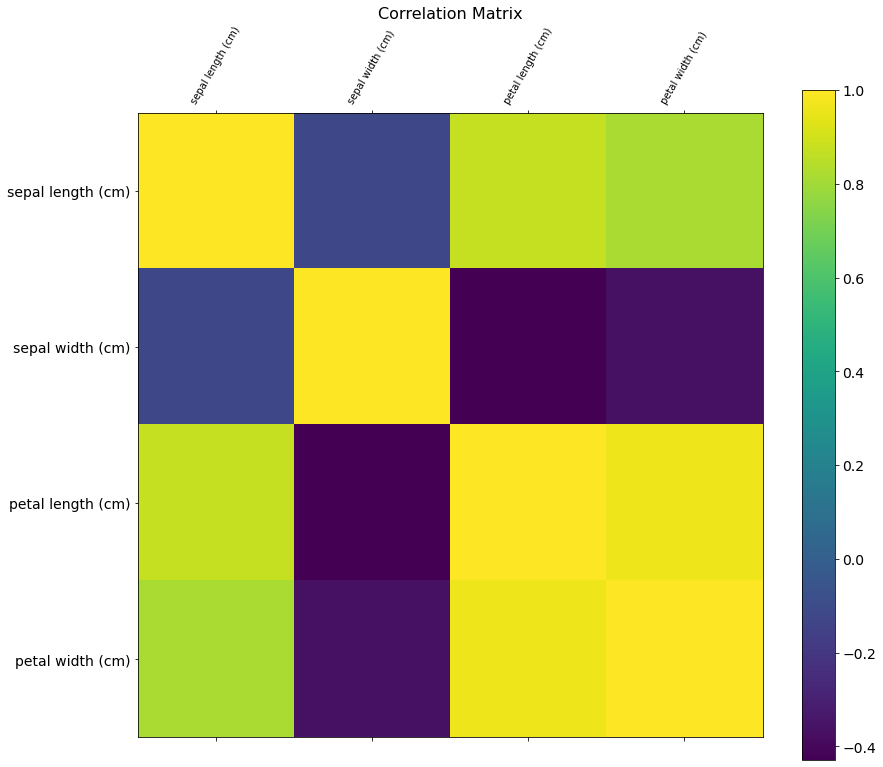

In [11]:
f = plt.figure(figsize=(14, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=60)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [12]:
pca = PCA(2)

In [13]:
pca.calculate_principal_components(df.to_numpy())

In [14]:
reduced_data = pca.transform(df.to_numpy())

In [15]:
y = df_tar.to_numpy()

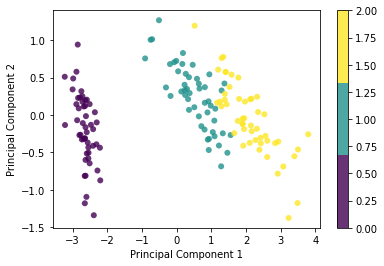

In [16]:
x1 = reduced_data[:,0]
x2 = reduced_data[:,1]

plt.scatter(x1, x2, c=y, edgecolor='none',alpha = 0.8,
                   cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [17]:
data = datasets.load_breast_cancer()

In [18]:
pca = PCA(3)

In [19]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [20]:
data['data'].shape

(569, 30)

In [21]:
pca.calculate_principal_components(data['data'])

In [22]:
reduced_data = pca.transform(data['data'])

In [23]:
reduced_data

array([[1160.1425737 , -293.91754364,   48.57839763],
       [1269.12244319,   15.63018184,  -35.39453423],
       [ 995.79388896,   39.15674324,   -1.70975298],
       ...,
       [ 314.50175618,   47.55352518,  -10.44240718],
       [1124.85811531,   34.12922497,  -19.74208742],
       [-771.52762188,  -88.64310636,   23.88903189]])

In [24]:
reduced_data[:,0]

array([ 1.16014257e+03,  1.26912244e+03,  9.95793889e+02, -4.07180803e+02,
        9.30341180e+02, -2.11591259e+02,  8.21210900e+02, -2.50899776e+01,
       -1.91292834e+02, -2.38292863e+02,  3.04687818e+02,  4.24361128e+02,
        6.34514335e+02,  6.30426906e+01, -1.96441210e+02,  5.60046828e+01,
        2.35858120e+02,  4.47392780e+02,  1.61509345e+03, -1.91621045e+02,
       -2.85051275e+02, -6.83583952e+02,  1.12560459e+02,  1.87373312e+03,
        1.27373066e+03,  6.34879769e+02,  8.59184126e+00,  6.77784526e+02,
        3.73719881e+02,  4.53678089e+02,  9.03981279e+02, -1.03689312e+02,
        5.24945203e+02,  1.06217159e+03,  4.04385934e+02,  4.10049756e+02,
       -8.06577946e+01, -3.55877850e+02, -1.28973156e+02, -1.70245723e+02,
       -1.27994761e+02, -4.62028008e+02,  8.97027427e+02, -3.43752015e+01,
       -1.84707363e+02,  8.07564573e+02, -7.83838668e+02, -1.66757183e+02,
       -3.62699507e+02, -2.05111744e+02, -4.30034080e+02, -2.35893530e+02,
       -4.16469507e+02,  

In [25]:
pca.get_components()[0]

array([ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,  5.16826469e-01,
        4.23694535e-06,  4.05260047e-05,  8.19399539e-05,  4.77807775e-05,
        7.07804332e-06, -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
        2.23634150e-03,  5.57271669e-02, -8.05646029e-07,  5.51918197e-06,
        8.87094462e-06,  3.27915009e-06, -1.24101836e-06, -8.54530832e-08,
        7.15473257e-03,  3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
        6.42005481e-06,  1.01275937e-04,  1.68928625e-04,  7.36658178e-05,
        1.78986262e-05,  1.61356159e-06])

In [26]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

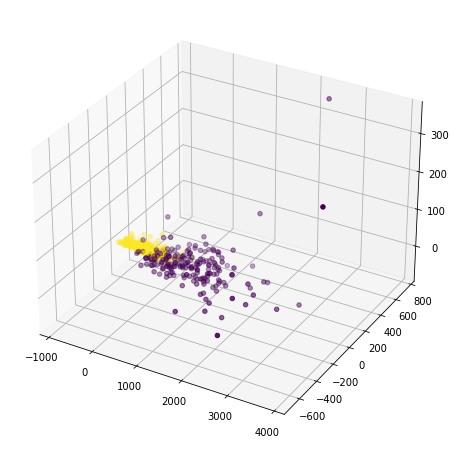

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(reduced_data[:,0],reduced_data[:,1],reduced_data[:,2],c=data['target'])
plt.show()

In [49]:
from collections import Counter

In [51]:
class KNN:
    def __init__(self, K):
        self.K = K
        self.X = np.array([])
        self.y = np.array([])
        
    @staticmethod
    def euclidian_distance(x1, x2):
        return np.sqrt(np.sum(x1 - x2)**2)
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # 1. calculate distances
        distances = [self.euclidian_distance(x, x_train) for x_train in self.X]
        # 2. get get k nearest samples + their labels
        k_indices = np.argsort(distances)[:self.K]
        k_nearest_labels = [self.y[i] for i in k_indices]
        # 3. majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        # 4. return most common
        return most_common

In [52]:
knn = KNN(5)

In [42]:
reduced_data.shape

(569, 3)

In [34]:
data['target'].shape

(569,)

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, data['target'], test_size=0.2, random_state=12)

In [53]:
knn.fit(X_train,y_train)

In [54]:
prediction = knn.predict(X_test)

In [55]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [56]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1])

In [57]:
def accuracy(true_values, predictions):
    N = true_values.shape[0]
    accuracy = (true_values == predictions).sum() / N
    TP = ((predictions == 1) & (true_values == 1)).sum()
    FP = ((predictions == 1) & (true_values == 0)).sum()
    precision = TP / (TP+FP)
    return precision

In [58]:
accuracy(y_test, prediction)

0.8289473684210527

In [68]:
knn = KNN(5)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
accuracy(y_test, prediction)

0.8289473684210527

See Linear Discriminant Analysis notebook -> LDA precision was around 92%